In [ ]:
pip install html5lib

In [ ]:
import bs4 as bs
import requests as req
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
site = req.get("https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory#void").text
soup = bs.BeautifulSoup(site, 'html5lib')
tableall = soup.findAll('table', attrs={'class': 'wikitable'})
Bodyt = tableall[2].find("tbody")
Trs = Bodyt.findAll("tr")
Tds = Bodyt.findAll('td')

In [ ]:
Dados = []
for n in range(39, 169):
  Tds2 = Tds[n].getText()
  Tds2 = Tds2.lstrip('\xa0')
  Tds2 = Tds2.rstrip('\n')
  Tds2 = Tds2.replace(',','')
  Dados.append(Tds2)

In [ ]:
covid19 = pd.DataFrame(np.array(Dados).reshape(10,13))
covid19 = covid19.drop(columns=[0])
for l in range(1,13):
  covid19[l] = covid19[l].astype(int)
covid19 = covid19.rename(columns={1: 'Jan',2: 'Fev',3: 'Mar',4: 'Abr', 5: 'Mai',6: 'Jun',7: 'Jul',8: 'Ago',9: 'Set',10: 'Out',11: 'Nov',12: 'Dez'},index={0: 'USA',1: 'Brazil',2: 'India' ,3: 'Mexico',4: 'UK',5: 'Italia',6: 'França',7: 'Irã', 8: 'Espanha', 9: 'Russia' })
covid19T = covid19.T
covid19

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
USA,0,0,0,2850,55337,102640,126573,151265,182162,204642,228185,264808
Brazil,0,0,0,159,5466,28834,58314,91263,120828,142921,159477,172833
India,0,0,0,38,1147,5394,17400,36511,65288,98678,122111,137621
Mexico,0,0,0,28,1732,9779,27121,46000,64158,77163,91289,105655
UK,0,0,0,1789,26771,38489,43730,46119,41501,42143,46555,58448
Italia,0,0,29,12430,27967,33415,34767,35141,35483,35894,38618,56361
França,0,0,2,3514,24342,28746,29760,30147,30494,31746,36473,53506
Irã,0,0,43,2898,6028,7797,10817,16766,21571,26169,34864,48246
Espanha,0,0,0,8189,24543,29045,28355,28445,29141,31791,35878,45069
Russia,0,0,0,17,1169,4855,9536,14058,17299,20891,28235,40464


In [ ]:
lista = ['USA','Brazil','India','Mexico','UK','Italia','França','Irã','Espanha','Russia']

In [ ]:
NCul = []
for m in lista:
  for n in range(11):
    a = covid19.loc[m][n]
    b = covid19.loc[m][n+1]
    c = b - a
    NCul.append(c)

In [ ]:
NCul = pd.DataFrame(np.array(NCul).reshape(10,11))
Ncul = NCul.rename(columns={0: 'Fev',1: 'Mar',2: 'Abr', 3: 'Mai',4: 'Jun',5: 'Jul',6: 'Ago',7: 'Set',8: 'Out',9: 'Nov',10: 'Dez'},index={0: 'USA',1: 'Brazil',2: 'India' ,3: 'Mexico',4: 'UK',5: 'Italia',6: 'França',7: 'Irã', 8: 'Espanha', 9: 'Russia' })
NculT = Ncul.T
Ncul

,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
USA,0,0,2850,52487,47303,23933,24692,30897,22480,23543,36623
Brazil,0,0,159,5307,23368,29480,32949,29565,22093,16556,13356
India,0,0,38,1109,4247,12006,19111,28777,33390,23433,15510
Mexico,0,0,28,1704,8047,17342,18879,18158,13005,14126,14366
UK,0,0,1789,24982,11718,5241,2389,-4618,642,4412,11893
Italia,0,29,12401,15537,5448,1352,374,342,411,2724,17743
França,0,2,3512,20828,4404,1014,387,347,1252,4727,17033
Irã,0,43,2855,3130,1769,3020,5949,4805,4598,8695,13382
Espanha,0,0,8189,16354,4502,-690,90,696,2650,4087,9191
Russia,0,0,17,1152,3686,4681,4522,3241,3592,7344,12229


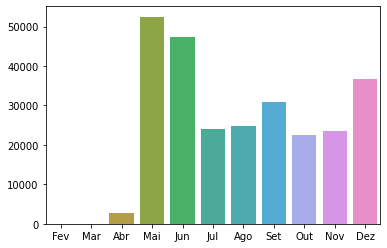

In [ ]:
#USA
sns.barplot(data=Ncul [0:1])
plt.show()

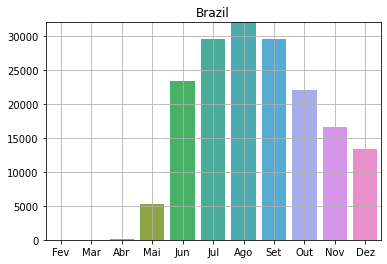

In [ ]:
#Brazil
sns.barplot(data=Ncul[1:2])
plt.title('Brazil')
plt.ylim(0,32000)
plt.grid()
plt.show()


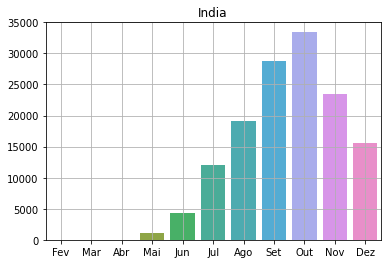

In [ ]:
#India
sns.barplot(data=Ncul [2:3])
plt.title('India')
plt.ylim(0,35000)
plt.grid()
plt.show()

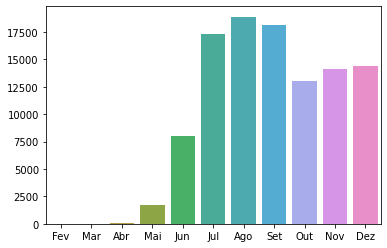

In [ ]:
#Mexico
sns.barplot(data=Ncul [3:4])
plt.show()

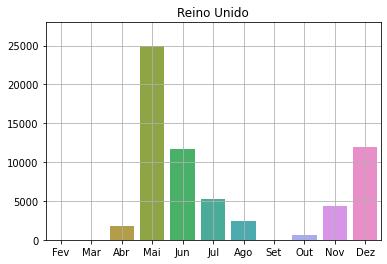

In [ ]:
#UK
sns.barplot(data=Ncul [4:5])
plt.title('Reino Unido')
plt.ylim(0,28000)
plt.grid()
plt.show()

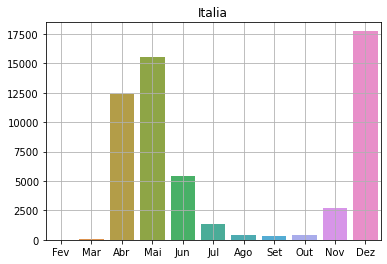

In [ ]:
#Italia
sns.barplot(data=Ncul [5:6])
plt.title('Italia')
plt.ylim(0,18500)
plt.grid()
plt.show()

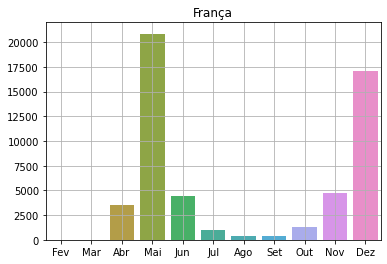

In [ ]:
#França
sns.barplot(data=Ncul [6:7])
plt.title('França')
plt.ylim(0,22000)
plt.grid()
plt.show()

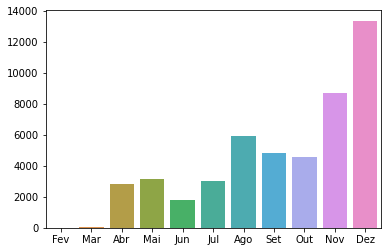

In [ ]:
#Irã
sns.barplot(data=Ncul [7:8])
plt.show()

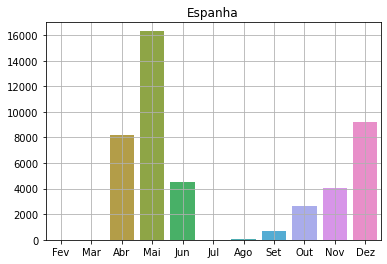

In [ ]:
#Espanha
sns.barplot(data=Ncul [8:9])
plt.title('Espanha')
plt.ylim(0,17000)
plt.grid()
plt.show()

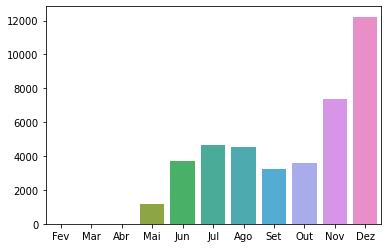

In [ ]:
#Russia
sns.barplot(data=Ncul [9:10])
plt.show()

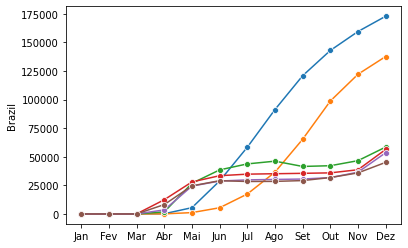

In [ ]:

sns.lineplot(data=covid19.loc['Brazil'], marker='o')
sns.lineplot(data=covid19.loc['India'], marker='o')
sns.lineplot(data=covid19.loc['UK'], marker='o')
sns.lineplot(data=covid19.loc['Italia'], marker='o')
sns.lineplot(data=covid19.loc['França'], marker='o')
sns.lineplot(data=covid19.loc['Espanha'], marker='o')

plt.show()

In [ ]:
#Média de mortos até dezembro
covid19.Dez.mean()

98301.1

In [ ]:
body2 = tableall[1].find("tbody")
data2 = body2.findAll("tr")
eua2 = data2[1].findAll('td')
eua2[4].getText()
tds2 = data2[1].findAll('td')

In [ ]:
lista2 = []
for n in range(1,len(data2)):
  tds2 = data2[n].findAll('td')
  for m in range(5):
    dad = tds2[m].getText()
    dad = dad.lstrip('\xa0')
    dad = dad.rstrip('\n')
    lista2.append(dad)

In [ ]:
df_covid2 = pd.DataFrame(np.array(lista2).reshape(179,5))
df_covid2 = df_covid2.rename(columns={0: 'País',1: 'Casos',2: 'Mortes' ,3: 'Fatalidades em %',4: 'Mortes por 100K habitantes' })
pd.set_option('display.max_rows', None)
df_covid2

,País,Casos,Mortes,Fatalidades em %,Mortes por 100K habitantes
0,Hungary,"799,588","29,329",3.70%,300.20
1,Czech Republic,"1,655,414","29,948",1.80%,280.68
2,Bosnia and Herzegovina,"202,847","9,086",4.50%,275.25
3,San Marino,"5,087",90,1.80%,265.80
4,North Macedonia,"154,891","5,249",3.40%,251.94
5,Montenegro,"99,031","1,566",1.60%,251.71
6,Bulgaria,"415,687","17,416",4.20%,249.66
7,Moldova,"254,213","6,053",2.40%,227.76
8,Slovakia,"388,138","12,262",3.20%,224.82
9,Belgium,"1,038,514","24,768",2.40%,215.67


In [ ]:
for a in range(len(df_covid2)):
  df_covid2['Fatalidades em %'][a] = df_covid2['Fatalidades em %'][a].replace('%','')

for a in range(len(df_covid2)):
  df_covid2.Casos[a] = df_covid2.Casos[a].replace(',','')

for a in range(len(df_covid2)):
  df_covid2.Mortes[a] = df_covid2.Mortes[a].replace(',','')

In [ ]:
df_covid2['Fatalidades em %'] = df_covid2['Fatalidades em %'].astype(float)
df_covid2['Casos'] = df_covid2['Casos'].astype(int)
df_covid2['Mortes'] = df_covid2['Mortes'].astype(int)


In [ ]:
dftop10f = df_covid2.sort_values(ascending= False, by='Fatalidades em %')
dftop10f = dftop10f.head(10)
dftop10f

,País,Casos,Mortes,Fatalidades em %,Mortes por 100K habitantes
135,Yemen,6593,1298,19.7,4.45
18,Mexico,2387512,220850,9.3,173.11
112,Syria,23884,1714,7.2,10.04
131,Sudan,34889,2446,7.0,5.71
107,Egypt,249238,14498,5.8,14.44
132,Somalia,14575,762,5.2,4.93
39,Ecuador,412907,19979,4.8,115.00
172,China,102797,4846,4.7,0.35
2,Bosnia and Herzegovina,202847,9086,4.5,275.25
123,Afghanistan,64122,2762,4.3,7.26


In [ ]:
dftop10 = df_covid2.sort_values(ascending= False, by='Mortes')

dftop10 = dftop10.head(6)

dftop10.sum()

País                          United StatesBrazilIndiaMexicoUnited KingdomItaly
Casos                                                                  85639522
Mortes                                                                  1790139
Fatalidades em %                                                           20.9
Mortes por 100K habitantes                  179.10209.2821.01173.11191.45206.72
dtype: object

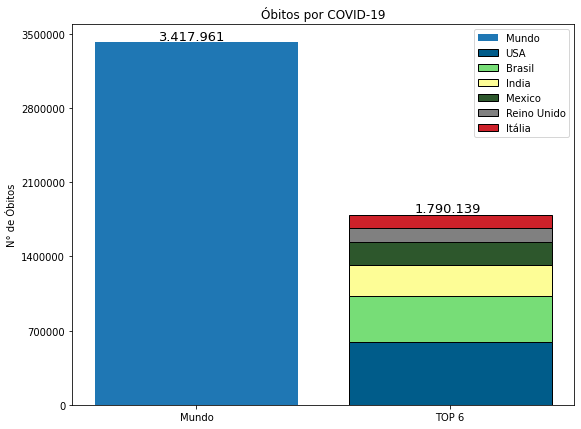

In [ ]:
Usa = [0,587874]
Brazil = [0,441691]
India = [0,287122]
Mexico = [0,220850]
ReinoU = [0,127956]
Italy = [0,124646]
world = [3417961,0]

all = ['Mundo','TOP 6']
plt.figure(figsize=(9,7))
plt.bar(all,world,label="Mundo")
plt.bar(all,Usa,color="#005c8A",label="USA",edgecolor='black')
plt.bar(all,Brazil,color="#77dd77",bottom=np.array(Usa),label="Brasil",edgecolor='black')
plt.bar(all,India,color="#fdfd96",bottom=np.array(Usa)+np.array(Brazil),label="India",edgecolor='black')
plt.bar(all,Mexico,color="#2d572c",bottom=np.array(Usa)+np.array(India)+np.array(Brazil),label="Mexico", edgecolor='black')
plt.bar(all,ReinoU,color="#808080",bottom=np.array(Usa)+np.array(India)+np.array(Brazil)+np.array(Mexico),label="Reino Unido",edgecolor='black')
plt.bar(all,Italy,color="#cd212a",bottom=np.array(Usa)+np.array(India)+np.array(Brazil)+np.array(Mexico)+np.array(ReinoU),label="Itália",edgecolor='black')
plt.yticks(np.arange(0,3500001, step = 700000))
plt.ticklabel_format(style='plain', axis='y')
plt.text(-0.15,3437961, '3.417.961', fontsize=13)
plt.text(0.86,1820139, '1.790.139', fontsize=13)
plt.title('Óbitos por COVID-19')
plt.ylabel('N° de Óbitos')
plt.legend()
plt.show()

In [ ]:
dftop10c = df_covid2.sort_values(ascending= False, by='Casos')

dftop10c = dftop10c.head(10)

dftop10c

,País,Casos,Mortes,Fatalidades em %,Mortes por 100K habitantes
17,United States,33026624,587874,1.8,179.10
92,India,25772440,287122,1.1,21.01
10,Brazil,15812055,441691,2.8,209.28
23,France,5978650,108342,1.8,161.56
66,Turkey,5151038,45419,0.9,54.44
58,Russia,4908794,115003,2.3,79.66
15,United Kingdom,4468366,127956,2.9,191.45
12,Italy,4172525,124646,3.0,206.72
45,Germany,3627777,86908,2.4,104.54
19,Spain,3625928,79568,2.2,169.02


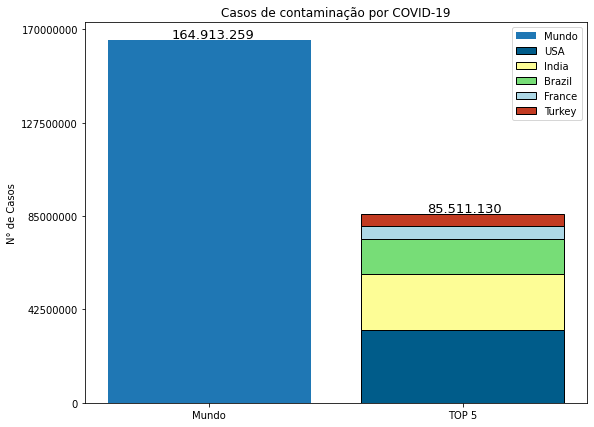

In [ ]:
Usa = [0,33026624]
India = [0,25772440]
Brazil = [0,15812055]
France = [0,5978650]
Turkey = [0,5151038]
world = [164913259,0]

all = ["Mundo","TOP 5"]

plt.figure(figsize=(9,7))
plt.bar(all,world,label="Mundo")
plt.bar(all,Usa,color="#005c8A",label="USA",edgecolor='black')
plt.bar(all,India,color="#fdfd96",bottom=np.array(Usa),label="India",edgecolor='black')
plt.bar(all,Brazil,color="#77dd77",bottom=np.array(Usa)+np.array(India),label="Brazil",edgecolor='black')
plt.bar(all,France,color="#add8e6",bottom=np.array(Usa)+np.array(India)+np.array(Brazil),label="France", edgecolor='black')
plt.bar(all,Turkey,color="#c23b22",bottom=np.array(Usa)+np.array(India)+np.array(Brazil)+np.array(France),label="Turkey",edgecolor='black')
plt.yticks(np.arange(0,180000000, step = 42500000))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Casos de contaminação por COVID-19')
plt.ylabel('N° de Casos')
plt.legend()

plt.text(-0.15,165913259, '164.913.259', fontsize=13)
plt.text(0.86,86611330, '85.511.130', fontsize=13)
plt.show()